# Identificação de Fraude
- Base disponível no [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
- Informações da base:
    - 'Time' (tempo): contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. 
    - 'Amount' (valor): é o valor da transação 
    - 'Class' (classe): é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário.
    - "Infelizmente, devido a questões de confidencialidade, não podemos fornecer os recursos originais e mais informações básicas sobre os dados. Características V1, V2, … V28 são os principais componentes obtidos com PCA"

In [2]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version
from sklearn import metrics

bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,
}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")

Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.8.4
NumPy                |     1.26.4
Pandas               |      2.2.2
Scikit-Learn         |      1.4.2
Seaborn              |     0.13.2

Versão do Python: 3.12.4


In [3]:
base = pd.read_csv(r'..\data\creditcard.csv\creditcard.csv')
base.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [4]:
#Verificando as informações da base
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- o Dataset possui 284 mil de linhas;
- Não possui valores nulos;
- Não possui colunas de texto

In [6]:
#Descrição da parte numerica
base.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Na coluna Amount existem transações de 0 reais;
- Na coluna Time e na coluna Amount existem valores bem distante das outras colunas, o que pode indicar que deveremos deixar na mesma escala.

In [8]:
base.query('Amount==0')

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
383,282.0,-0.356466,0.725418,1.971749,0.831343,0.369681,-0.107776,0.751610,-0.120166,-0.420675,...,0.020804,0.424312,-0.015989,0.466754,-0.809962,0.657334,-0.043150,-0.046401,0.0,0
514,380.0,-1.299837,0.881817,1.452842,-1.293698,-0.025105,-1.170103,0.861610,-0.193934,0.592001,...,-0.272563,-0.360853,0.223911,0.598930,-0.397705,0.637141,0.234872,0.021379,0.0,0
534,403.0,1.237413,0.512365,0.687746,1.693872,-0.236323,-0.650232,0.118066,-0.230545,-0.808523,...,-0.077543,-0.178220,0.038722,0.471218,0.289249,0.871803,-0.066884,0.012986,0.0,0
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.0,1
575,430.0,-1.860258,-0.629859,0.966570,0.844632,0.759983,-1.481173,-0.509681,0.540722,-0.733623,...,0.268028,0.125515,-0.225029,0.586664,-0.031598,0.570168,-0.043007,-0.223739,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283719,171817.0,-0.750414,0.904175,0.996461,0.427284,1.720336,0.929256,0.794272,0.176719,-1.836261,...,0.050750,0.115532,-0.623995,-0.186896,0.733759,2.558151,-0.188835,0.001654,0.0,0
283782,171870.0,2.083677,-0.065811,-1.442870,0.135416,0.043035,-1.306975,0.335835,-0.371635,0.730560,...,-0.147536,-0.246599,0.194758,-0.082277,0.012887,-0.069278,-0.048995,-0.065482,0.0,0
283949,172027.0,2.132569,-0.057836,-1.724522,-0.030326,0.412146,-0.903088,0.345843,-0.348132,0.722638,...,-0.188739,-0.343876,0.105024,-0.763831,0.117381,-0.027682,-0.047514,-0.071700,0.0,0
284085,172140.0,-2.210521,-1.039425,0.189704,-1.291932,3.742120,-1.665061,3.120388,-2.324089,0.364926,...,-0.286359,1.326003,-0.361764,-0.268117,1.051309,0.334629,-1.930149,-0.899888,0.0,0


- Aproximadamente, 0,64% da base tem transações (Amount) = 0, por não ter informações suficiente sobre essa base, ainda não farei nenhuma tratativa sobre as informações acima.

In [10]:
print(f'Existem {round(base.Class.value_counts(normalize=True)*100,2)[0]}% dos clientes da base que não são fraude.')
print(f'Existem {round(base.Class.value_counts(normalize=True)*100,2)[1]}% dos clientes da base que são fraude.')

Existem 99.83% dos clientes da base que não são fraude.
Existem 0.17% dos clientes da base que são fraude.


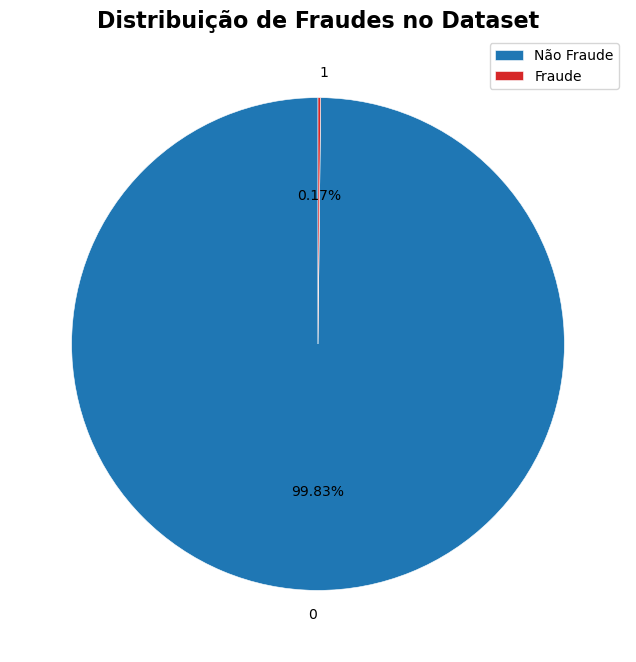

In [11]:
import matplotlib.pyplot as plt

# Configurações do gráfico
plt.figure(figsize=(8, 8))
cores = ['#1f77b4', '#d62728']  
base.Class.value_counts().plot.pie(
    autopct='%.2f%%',  
    startangle=90,     
    colors=cores,      
    wedgeprops={'edgecolor': 'white', 'linewidth': 0.4} 
)

# Título
plt.title('Distribuição de Fraudes no Dataset', fontsize=16, weight='bold')
plt.ylabel('')

# legenda
plt.legend([f'Não Fraude', f'Fraude'], loc="upper right")

#Salvar e plotar o gráfico
plt.savefig('../imagem/distribuicao.png')
plt.show()

<Axes: >

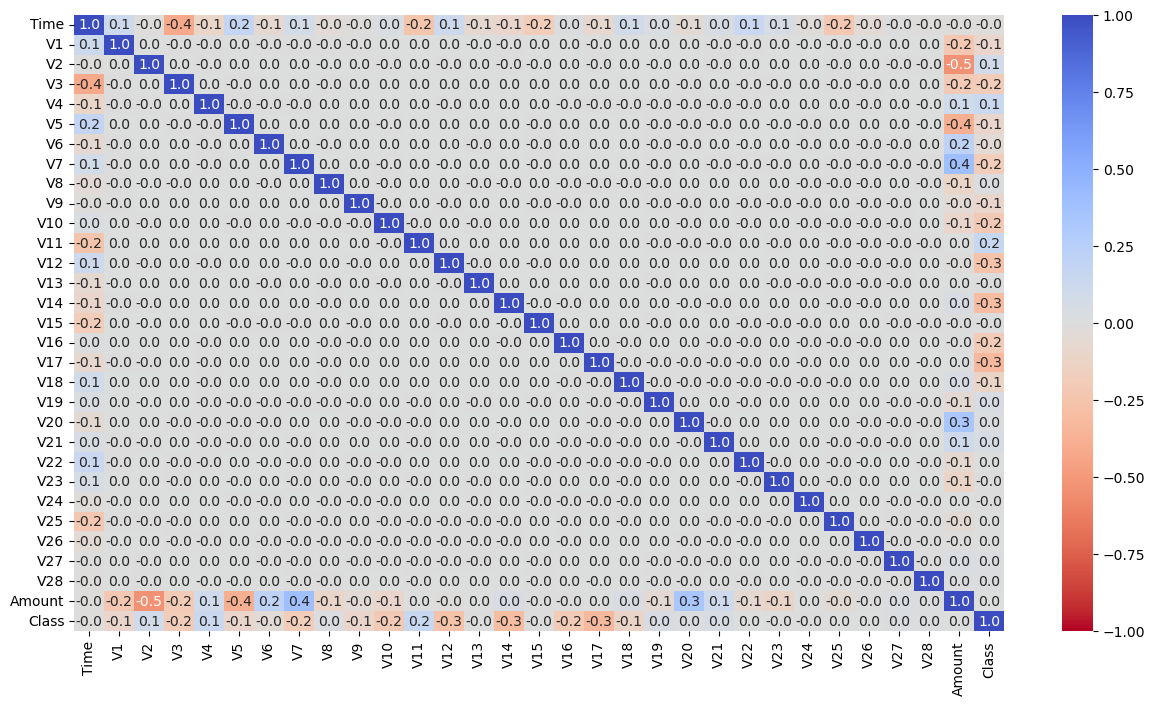

In [12]:
# Definindo o tamanho da figura
plt.figure(figsize=(15, 8))

# Gerando o heatmap com anotações reduzidas para 2 casas decimais
sns.heatmap(base.corr(), annot=True, vmin = -1,
            vmax = 1,fmt=".1f", cmap='coolwarm_r')

- Importante ressaltar que, como a base passou por um processo de PCA por questões de confidencialidades, é esperado não ter fortes correlações.
- É possível observar existem 4 variáveis negativas com Class, 'V10', 'V12', 'V14', 'V16' e que existe 1 variável positiva com Class: 'V11'

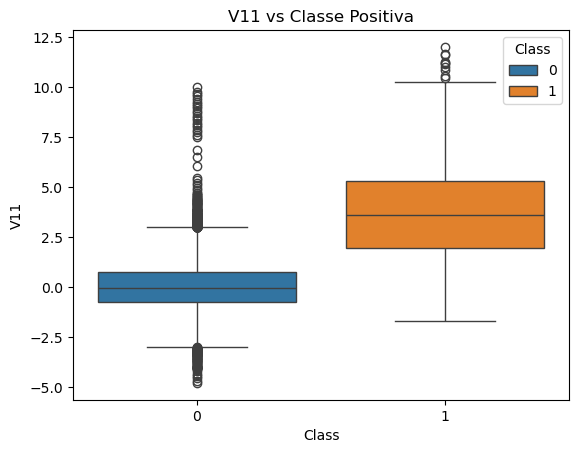

In [14]:
#Correlação positiva
fig, ax = plt.subplots()
sns.boxplot(x="Class", y="V11", data=base,hue="Class")
ax.set_title('V11 vs Classe Positiva')

plt.show()

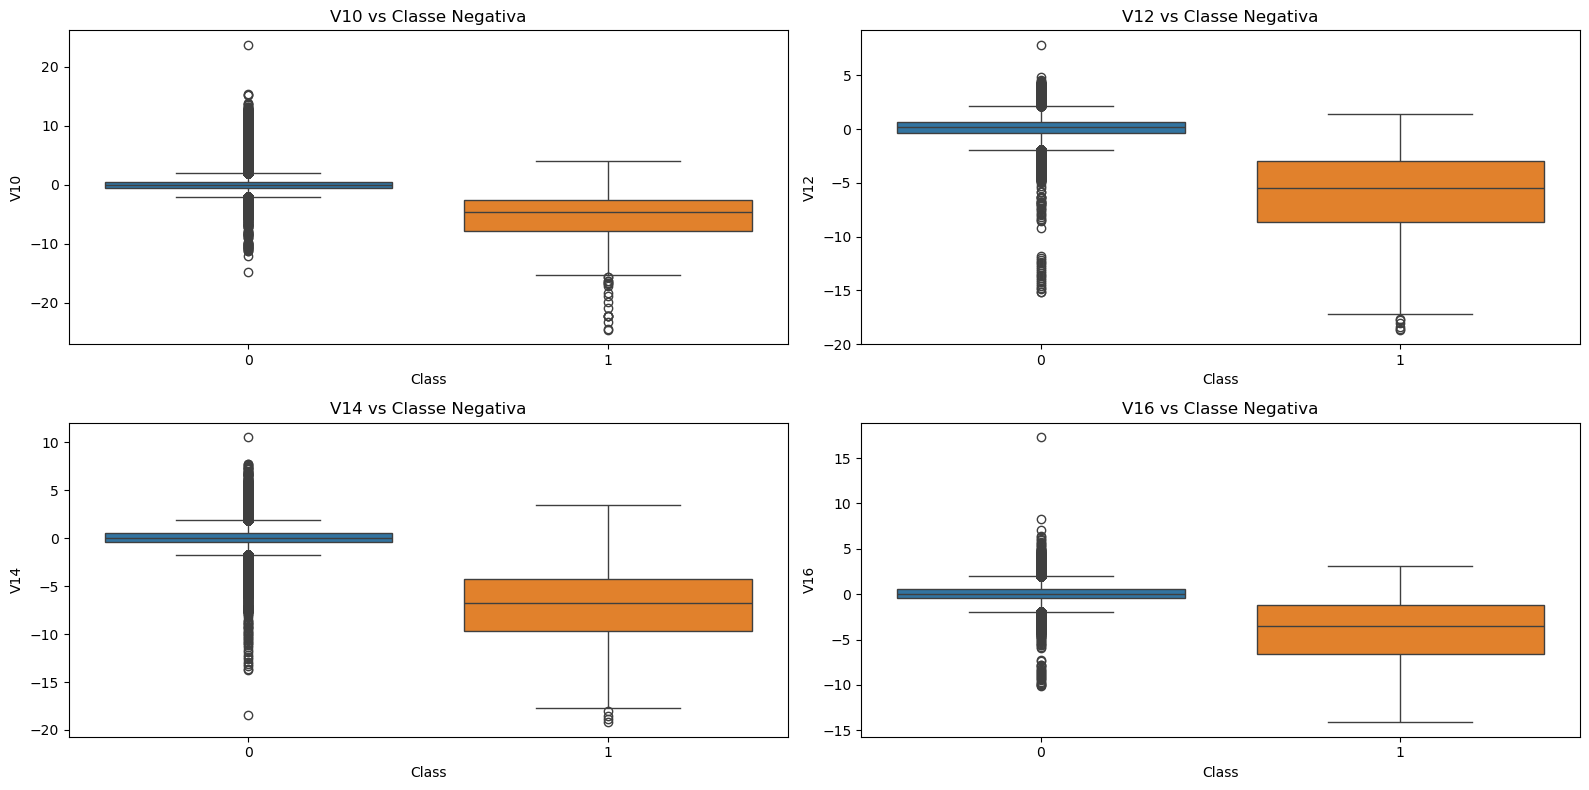

In [15]:
#Correlação negativa
features = ['V10', 'V12', 'V14', 'V16']
titles = ['V10 vs Classe Negativa', 'V12 vs Classe Negativa', 'V14 vs Classe Negativa', 'V16 vs Classe Negativa']

f, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))

for i, (feature, title) in enumerate(zip(features, titles)):
    row, col = divmod(i, 2)  # Calcula a posição da subplot na matriz 2x2
    sns.boxplot(x="Class", y=feature, data=base, hue="Class", ax=axes[row, col], legend=False)
    axes[row, col].set_title(title)

plt.tight_layout() 
plt.savefig('../imagem/Análise das features.png')
plt.show()

- É possível verificar uma grande quantidade de outliers em todos os gráficos

In [17]:
# Criando uma função para detectar Outliers
def inspect_outliers(dataframe,column,whisker_width=1.5):
    '''
    Função utilizada para verificar outliers
    Utilizando fórmula básica que define o boxplot
    
    retorna o dataframe filtrado com os outliers
    '''
    q1= dataframe[column].quantile(0.25)
    q3= dataframe[column].quantile(0.75)
    iqr= q3-q1
    lower_bound = q1-(whisker_width*iqr)
    upper_bound = q3+(whisker_width*iqr)
    
    return dataframe[
          (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    ]


In [18]:
#Verificando exemplos de outliers na coluna V10
inspect_outliers(base, features[0])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
82,52.0,-3.005237,2.600138,1.483691,-2.418473,0.306326,-0.824575,2.065426,-1.829347,4.009259,...,-0.852309,-0.181268,-0.163747,0.515821,0.136318,0.460054,-0.251259,-1.105751,1.46,0
132,83.0,-1.864990,0.910874,1.724863,-1.748371,0.578943,-0.832531,1.901440,-1.913986,2.112375,...,-0.318597,0.073323,-0.061693,0.547204,-0.466798,0.408030,-2.377933,-1.255549,7.69,0
146,92.0,-5.285971,4.847323,-1.290368,-1.427842,-0.621533,-0.604691,0.437866,0.336384,3.558373,...,-0.923604,-1.171187,0.150872,-0.493322,1.050554,0.194865,2.490503,1.575380,8.95,0
190,125.0,-2.807065,1.183098,2.974779,2.801477,-0.475110,3.217829,-0.401608,0.384395,2.408675,...,-0.201782,1.461535,-0.000330,-0.581133,-0.101785,0.529386,0.362411,0.237647,43.71,0
225,147.0,-2.687978,4.390230,-2.360483,0.360829,1.310192,-1.645253,2.327776,-1.727825,4.324752,...,-1.045961,-0.156951,0.079854,-0.012598,0.207194,-0.536578,0.950393,-0.624431,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284742,172734.0,-1.248847,2.279478,-1.144824,-0.263061,0.070912,-0.323414,-1.454139,-5.069379,-0.827733,...,-2.704489,0.261945,0.490272,-0.112758,-0.453183,-0.694933,-0.106693,0.082714,9.99,0
284765,172754.0,-2.433477,2.859978,-1.714267,-1.964427,1.070515,-1.098247,1.814726,-0.508294,1.980996,...,-0.192003,0.781494,-0.167831,0.682687,0.110603,-0.020888,0.752567,-0.029560,0.77,0
284772,172760.0,-6.713826,2.369104,-3.534768,-0.368259,-1.721030,-1.322808,-0.190876,0.891149,2.068476,...,0.131247,0.994246,-0.002140,-0.072979,-0.167159,-0.387271,-2.616341,0.474584,19.59,0
284795,172778.0,-12.516732,10.187818,-8.476671,-2.510473,-4.586669,-1.394465,-3.632516,5.498583,4.893089,...,-0.944759,-1.565026,0.890675,-1.253276,1.786717,0.320763,2.090712,1.232864,9.87,0


#### Verificando Outliers das colunas selecionadas em features e excluindo as linhas que apareçam nas 4 colunas
<p> Relembrando as colunas features = ['V10', 'V12', 'V14', 'V16'] </p>

In [20]:
# Identificar os índices de linhas com outliers em cada coluna
outlier_indices = [inspect_outliers(base, feature).index for feature in features]

# Contar a ocorrência de cada índice nas listas de outliers
contar_outlier = pd.Series([index for sublist in outlier_indices for index in sublist]).value_counts()

# Filtrar os índices que aparecem em 4
Outliers_em_comum = contar_outlier[contar_outlier >= 4].index
print(f'Linhas excluidas em 4 colunas{Outliers_em_comum.shape}')
outliers=base.loc[Outliers_em_comum]
print(f'Existem {round(outliers.Class.value_counts(normalize=True)*100,2)[0]}% dos clientes da base que não são fraude.')
print(f'Existem {round(outliers.Class.value_counts(normalize=True)*100,2)[1]}% dos clientes da base que são fraude.')
print('')
# Filtrar os índices que aparecem em 3 ou mais colunas
Outliers_em_comum = contar_outlier[contar_outlier >= 3].index
outliers=base.loc[Outliers_em_comum]
print(f'Linhas excluidas em 3 colunas{Outliers_em_comum.shape}')
print(f'Existem {round(outliers.Class.value_counts(normalize=True)*100,2)[0]}% dos clientes da base que não são fraude.')
print(f'Existem {round(outliers.Class.value_counts(normalize=True)*100,2)[1]}% dos clientes da base que são fraude.')
print('')
# Filtrar os índices que aparecem em 2 ou mais colunas
Outliers_em_comum = contar_outlier[contar_outlier >= 2].index
outliers=base.loc[Outliers_em_comum]
print(f'Linhas excluidas em 2 colunas{Outliers_em_comum.shape}')
print(f'Existem {round(outliers.Class.value_counts(normalize=True)*100,2)[0]}% dos clientes da base que não são fraude.')
print(f'Existem {round(outliers.Class.value_counts(normalize=True)*100,2)[1]}% dos clientes da base que são fraude.')
print('')
# Filtrar os índices que aparece em pelo menos 1 coluna
Outliers_em_comum = contar_outlier[contar_outlier >= 1].index
outliers=base.loc[Outliers_em_comum]
print(f'Linhas excluidas em 1 colunas{Outliers_em_comum.shape}')
print(f'Existem {round(outliers.Class.value_counts(normalize=True)*100,2)[0]}% dos clientes da base que não são fraude.')
print(f'Existem {round(outliers.Class.value_counts(normalize=True)*100,2)[1]}% dos clientes da base que são fraude.')
print('')

Linhas excluidas em 4 colunas(455,)
Existem 27.91% dos clientes da base que não são fraude.
Existem 72.09% dos clientes da base que são fraude.

Linhas excluidas em 3 colunas(1179,)
Existem 66.58% dos clientes da base que não são fraude.
Existem 33.42% dos clientes da base que são fraude.

Linhas excluidas em 2 colunas(6972,)
Existem 94.03% dos clientes da base que não são fraude.
Existem 5.97% dos clientes da base que são fraude.

Linhas excluidas em 1 colunas(38571,)
Existem 98.83% dos clientes da base que não são fraude.
Existem 1.17% dos clientes da base que são fraude.



- Em todos os cenários estaremos retirando percentualmente mais fraudes que no dataset original, assim, piorando o modelo.
<p>Logo, nesse momento não excluirei outliers</p>

# Verificando como se comporta o resultado.

In [23]:
# Separando em X e y
X=base.drop('Class',axis=1)
y=base.Class

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42,stratify=y)

In [25]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
y_pred = clf.predict(X_test)

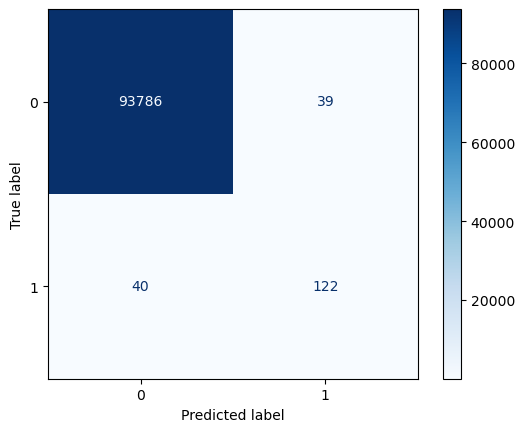

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred)
# Exibindo a matriz de confusão em gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [27]:
#Verificando o recall
from sklearn.metrics import recall_score,precision_score,precision_recall_curve
recall_score(y_test, y_pred, average=None)

array([0.99958433, 0.75308642])

- Em um problema de detecção de fraudes, é normalmente mais importante maximizar o recall para garantir que a maior quantidade possível de fraudes seja identificada, mesmo que isso possa reduzir a precisão.

### Realizando o Random Undersampling e Utilizando a Árvore de decisão

In [30]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

In [31]:
X_res, y_res = rus.fit_resample(X_train, y_train)

In [32]:
#Verificando para a árvore de decisão
clf_DT = tree.DecisionTreeClassifier(random_state=42).fit(X_res, y_res)
y_pred_DT = clf_DT.predict(X_test)

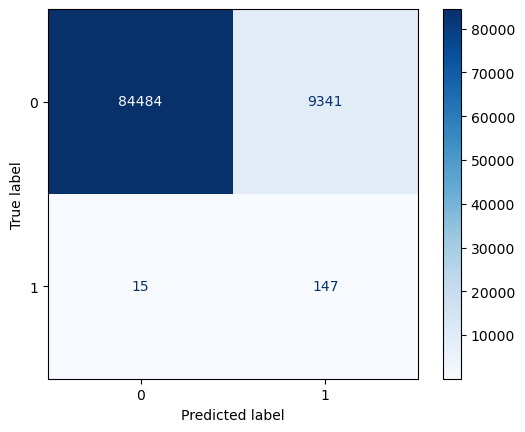

In [33]:
# Gerar a matriz de confusão
cm = confusion_matrix(y_test, y_pred_DT)
# Exibindo a matriz de confusão em gráfico
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

- Após utilizar o método RUS para reduzir a quantidade de dados não fraudulentos e utilizando o modelo de Árvore de decisão melhorei o número de verdadeiros positivos (aumentando de 122 para 147), notei que acabei classificando muitos valores (9341) como fraudulentos quando, na verdade, não são.
### Verificando para Regressão logística

In [35]:
from sklearn.linear_model import LogisticRegression
clf_RL = LogisticRegression(random_state=42).fit(X_res, y_res)
y_pred_RL = clf_RL.predict(X_test)
confusion_matrix(y_test, y_pred_RL)

C:\Users\Seven\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[88918,  4907],
       [   18,   144]], dtype=int64)

- Ao utilizar a Regressão Logística, observamos uma redução de 2% nos verdadeiros positivos (de 147 para 144). No entanto, conseguimos diminuir em 47% o número de transações erroneamente classificadas como fraudulentas (de 9341 para 4907).
### Verificando para SVC

In [37]:
from sklearn.svm import SVC
clf_SVC = SVC(random_state=42,probability=True).fit(X_res, y_res)
y_pred_SVC = clf_SVC.predict(X_test)
confusion_matrix(y_test, y_pred_SVC)

array([[41756, 52069],
       [   46,   116]], dtype=int64)

- Ao Utilizar o SVC, observamos que ele piorou em todos os casos.
### Verificando para o KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=3).fit(X_res, y_res)
y_pred_KNN = clf_KNN.predict(X_test)
confusion_matrix(y_test, y_pred_KNN)

array([[60332, 33493],
       [   54,   108]], dtype=int64)

- Ao Utilizar o KNN, observamos que ele melhorou em relação ao SVC, porém continua pior em relação a regressão logística
### Verificando para o RandomForest

In [41]:
from sklearn.ensemble import RandomForestClassifier
clf_RF =RandomForestClassifier(max_depth=2, random_state=42).fit(X_res, y_res)
y_pred_RF = clf_RF.predict(X_test)
confusion_matrix(y_test, y_pred_RF)

array([[93221,   604],
       [   26,   136]], dtype=int64)

- Ao utilizar o RF,  tivemos uma redução de aproximadamente 5% em relação a RL nos verdadeiros positivos (144 para 136),  No entanto, conseguimos diminuir em mais de 87% o número de transações erroneamente classificadas como fraudulentas (4907 para 604).
### Avaliando todos os modelos

In [43]:
# Árvore de Decisão
print('Árvore de Decisão')
print(f'Recall: {recall_score(y_test, y_pred_DT)}')
print(f'Precisão: {precision_score(y_test, y_pred_DT)}')

# Regressão Logística
print('Regressão Logística')
print(f'Recall: {recall_score(y_test, y_pred_RL)}')
print(f'Precisão: {precision_score(y_test, y_pred_RL)}')

# SVC
print('SVC')
print(f'Recall: {recall_score(y_test, y_pred_SVC)}')
print(f'Precisão: {precision_score(y_test, y_pred_SVC)}')

# KNN
print('KNN')
print(f'Recall: {recall_score(y_test, y_pred_KNN)}')
print(f'Precisão: {precision_score(y_test, y_pred_KNN)}')

# Random Forest
print('Random Forest')
print(f'Recall: {recall_score(y_test, y_pred_RF)}')
print(f'Precisão: {precision_score(y_test, y_pred_RF)}')

Árvore de Decisão
Recall: 0.9074074074074074
Precisão: 0.015493254637436763
Regressão Logística
Recall: 0.8888888888888888
Precisão: 0.028509206097802414
SVC
Recall: 0.7160493827160493
Precisão: 0.002222860975376066
KNN
Recall: 0.6666666666666666
Precisão: 0.0032141900538674444
Random Forest
Recall: 0.8395061728395061
Precisão: 0.1837837837837838


In [44]:
# Dicionário dos modelos
models = {
    'y_pred_proba_DT': clf_DT,
    'y_pred_proba_RL': clf_RL,
    'y_pred_proba_SVC': clf_SVC,
    'y_pred_proba_KNN': clf_KNN,
    'y_pred_proba_RF': clf_RF
}

# Criando um dicionário para armazenar as previsões de probabilidade
proba = {}

# Calculando as previsões de probabilidade
for name, model in models.items():
    proba[name] = model.predict_proba(X_test)[:, 1]

In [45]:
# Dicionários para armazenar as métricas
precision = {}
recall = {}
thresholds = {}

# Calculando a precisão e recall para cada modelo
for name in proba:
    precision[name], recall[name], thresholds[name] = precision_recall_curve(y_test, proba[name])

print('Precisão DT:', precision['y_pred_proba_DT'])
print('Recall DT:', recall['y_pred_proba_DT'])
print('Thresholds for DT:', thresholds['y_pred_proba_DT'])

Precisão DT: [0.00172364 0.01549325 1.        ]
Recall DT: [1.         0.90740741 0.        ]
Thresholds for DT: [0. 1.]


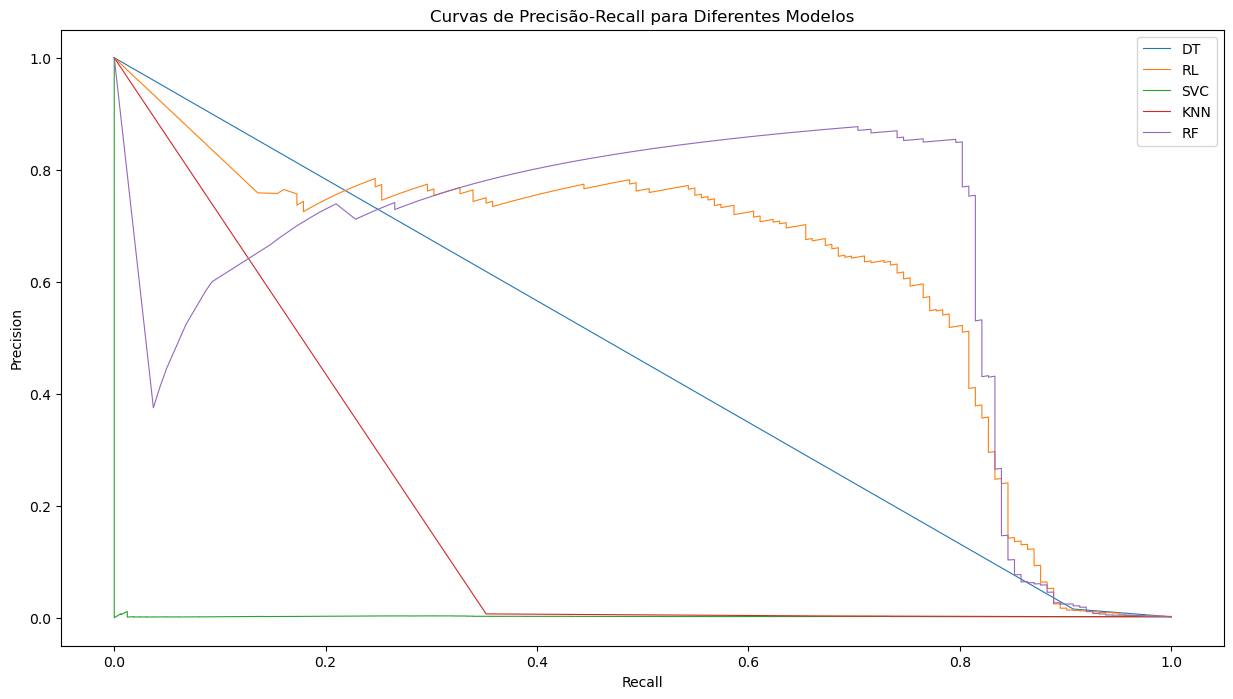

In [46]:
fig, ax = plt.subplots(figsize=(15, 8))

# Curvas de precisão-recall
for name in proba:
    ax.plot(recall[name], precision[name], linewidth=0.8, label=name[-3:].replace('_',''))

# Configurações
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Curvas de Precisão-Recall para Diferentes Modelos')
ax.legend(loc='upper right')
plt.show()

In [47]:
# Avaliando a área abaixo do gráfico
for name in proba:
    print(f'{name[-3:].replace('_','')} = {metrics.auc(recall[name], precision[name])}')

DT = 0.46153012929239556
RL = 0.6214034999813438
SVC = 0.0022305086624564716
KNN = 0.17950296059526705
RF = 0.6421153241571188


# Proxímo passo:
- Agora que já sei como o dataset se comporta utilizando 5 modelos e com pouca padronização, irei fazer ajustes para melhorar a resposta.

In [49]:
#Padronizar as colunas Time e Amount com MinMaxScaller para deixar no mesmo range das outras
from sklearn.preprocessing import MinMaxScaler
cols_MinMax = ['Time','Amount']
scaler = MinMaxScaler()

# Ajustando os dados das colunas selecionadas
scaled_data = scaler.fit_transform(base[cols_MinMax])

# Criando um novo DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=cols_MinMax)

# Substituindo as colunas
base[['Time', 'Amount']] = scaled_df

- Rodando novamente as informações de classificação até a geração dos gráficos, temos alguns modelos melhorando.
- Apenas com a normalização dos dados:

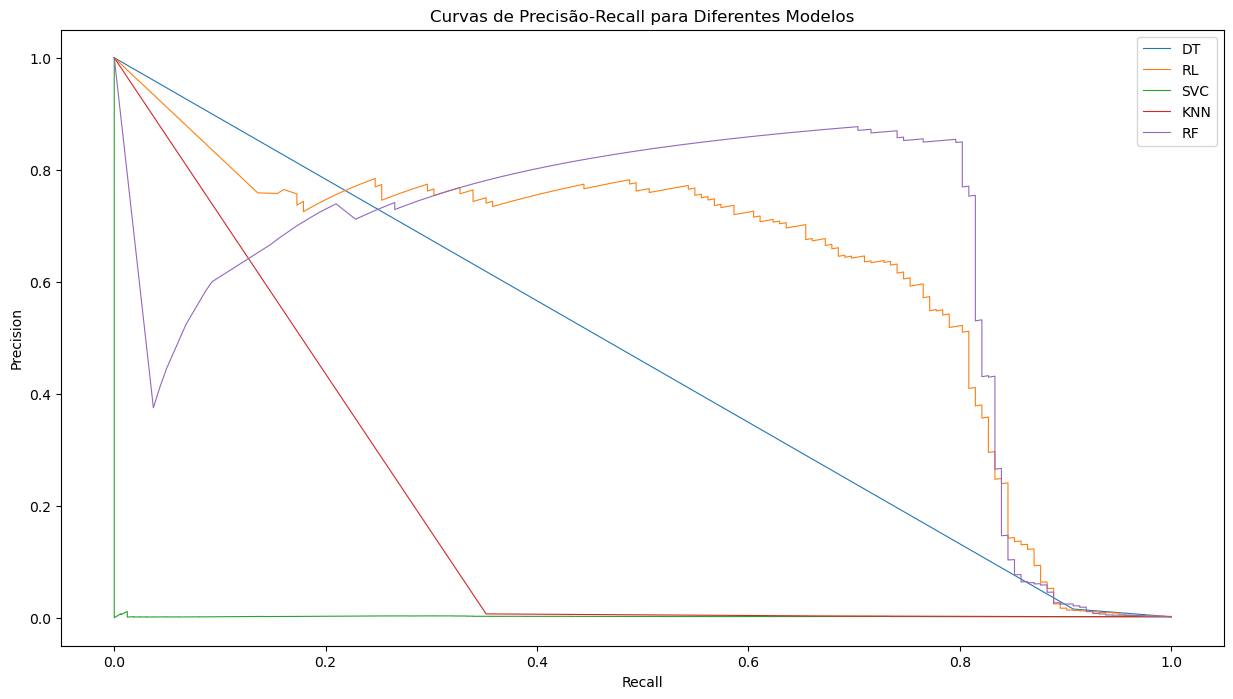

In [51]:
fig, ax = plt.subplots(figsize=(15, 8))  # Define um tamanho de gráfico maior, se desejar

# Curvas de precisão-recall
for name in proba:
    ax.plot(recall[name], precision[name], linewidth=0.8, label=name[-3:].replace('_',''))

# Configurações do gráfico
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Curvas de Precisão-Recall para Diferentes Modelos')
ax.legend(loc='upper right')
plt.savefig('../imagem/Curvas de Precisão-Recall.png')
plt.show()

In [52]:
# Avaliando a área debaixo do gráfico
for name in proba:
    print(f'{name[-3:].replace('_','')} = {metrics.auc(recall[name], precision[name])}')

DT = 0.46153012929239556
RL = 0.6214034999813438
SVC = 0.0022305086624564716
KNN = 0.17950296059526705
RF = 0.6421153241571188


- Verificando os 3 modelos que geraram melhor resultado

In [54]:
#DT
confusion_matrix(y_test, y_pred_DT)

array([[84484,  9341],
       [   15,   147]], dtype=int64)

In [55]:
#RL
confusion_matrix(y_test, y_pred_RL)

array([[88918,  4907],
       [   18,   144]], dtype=int64)

In [56]:
#SVC
confusion_matrix(y_test, y_pred_SVC)

array([[41756, 52069],
       [   46,   116]], dtype=int64)

In [57]:
#KNN
confusion_matrix(y_test, y_pred_KNN)

array([[60332, 33493],
       [   54,   108]], dtype=int64)

In [58]:
#RF
confusion_matrix(y_test, y_pred_RF)

array([[93221,   604],
       [   26,   136]], dtype=int64)

In [59]:
# Árvore de Decisão
print('Árvore de Decisão')
print(f'Recall: {recall_score(y_test, y_pred_DT)}')
print(f'Precisão: {precision_score(y_test, y_pred_DT)}')

# Regressão Logística
print('Regressão Logística')
print(f'Recall: {recall_score(y_test, y_pred_RL)}')
print(f'Precisão: {precision_score(y_test, y_pred_RL)}')

# SVC
print('SVC')
print(f'Recall: {recall_score(y_test, y_pred_SVC)}')
print(f'Precisão: {precision_score(y_test, y_pred_SVC)}')

# KNN
print('KNN')
print(f'Recall: {recall_score(y_test, y_pred_KNN)}')
print(f'Precisão: {precision_score(y_test, y_pred_KNN)}')

# Random Forest
print('Random Forest')
print(f'Recall: {recall_score(y_test, y_pred_RF)}')
print(f'Precisão: {precision_score(y_test, y_pred_RF)}')

Árvore de Decisão
Recall: 0.9074074074074074
Precisão: 0.015493254637436763
Regressão Logística
Recall: 0.8888888888888888
Precisão: 0.028509206097802414
SVC
Recall: 0.7160493827160493
Precisão: 0.002222860975376066
KNN
Recall: 0.6666666666666666
Precisão: 0.0032141900538674444
Random Forest
Recall: 0.8395061728395061
Precisão: 0.1837837837837838


- Os modelos que irei usar são: RL, SVC, KNN e RF